In [1]:
from metrics import *
import torch
from torch_geometric.datasets import Planetoid
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
import numpy as np
from time import time
from tqdm import tqdm
from utils import *
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import umap
from trimap import TRIMAP
from umap import UMAP
import warnings

random_state = 0
random.seed(0)
torch.manual_seed(0)

warnings.filterwarnings('ignore', message="n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.")
warnings.filterwarnings('ignore', message="Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.")
warnings.filterwarnings('ignore', message="Graph is not fully connected, spectral embedding may not work as expected.")

print("Cuda available?", torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Cuda available? True


In [2]:
dataset_name = "Cora"
original_gnn = "original"
algorithm_name = "TRIMAP"

dataset = Planetoid(root=".", name="Cora")
data = dataset[0]  # Graph data

# Standardizing the features
X = data.x.numpy()
y = dataset[0].y.cpu().numpy()
# tsne = TSNE()
# X_tsne = tsne.fit_transform(X)

Calculating d_hd
Cora TRIMAP-euclidean
Calculating d_hd
Cora TRIMAP-manhattan
Calculating d_hd
Cora TRIMAP-cosine
Finished.


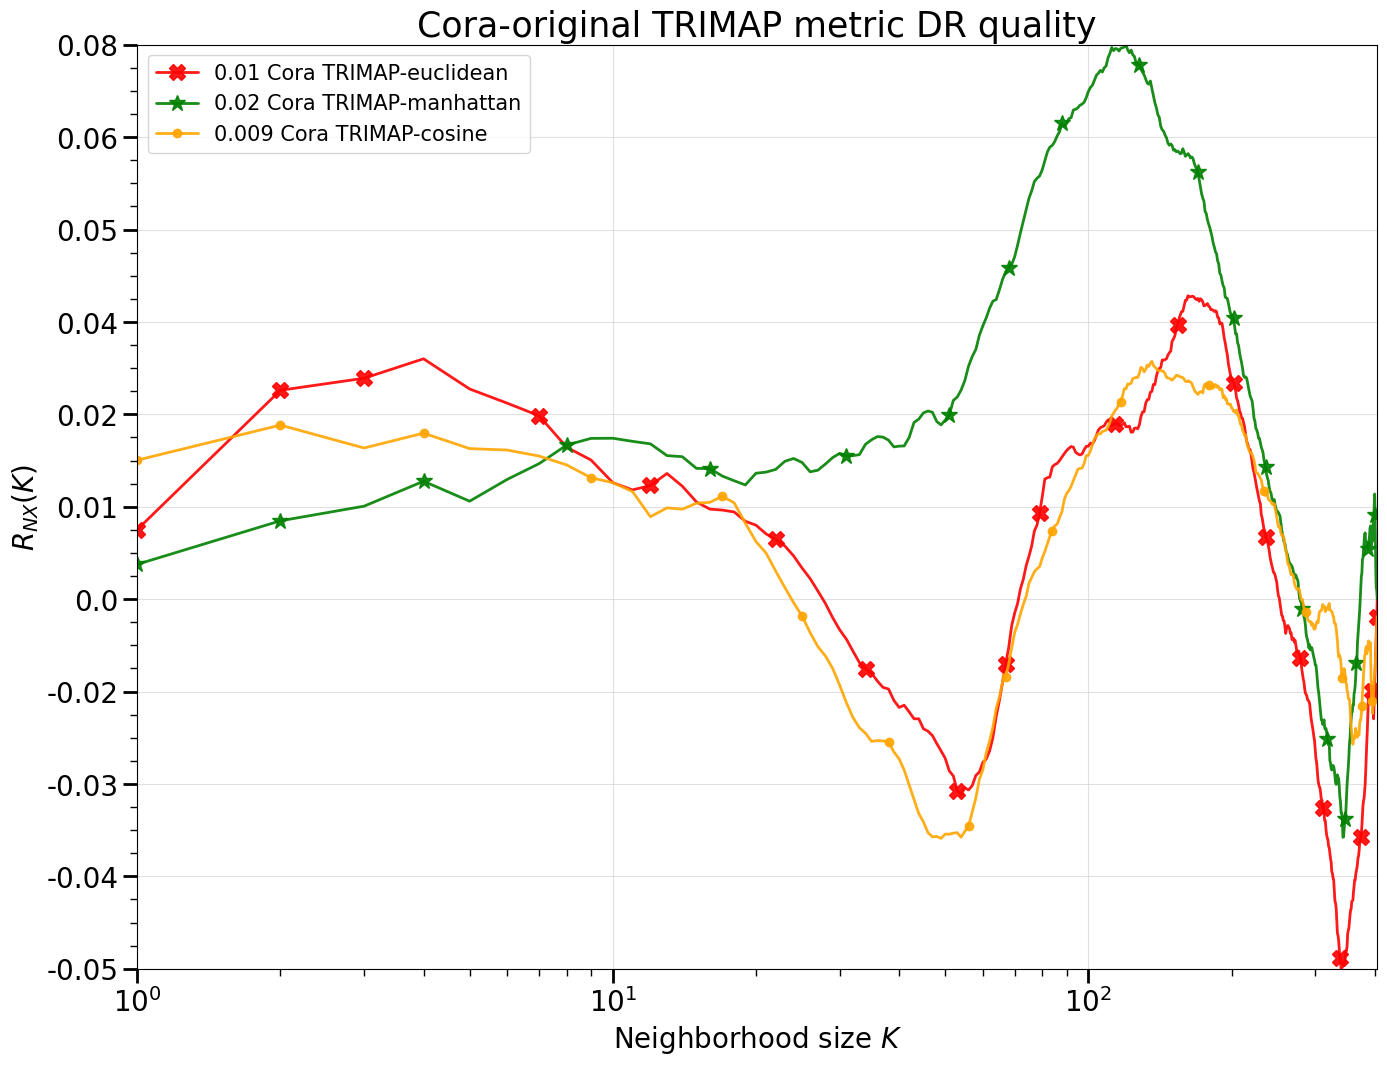

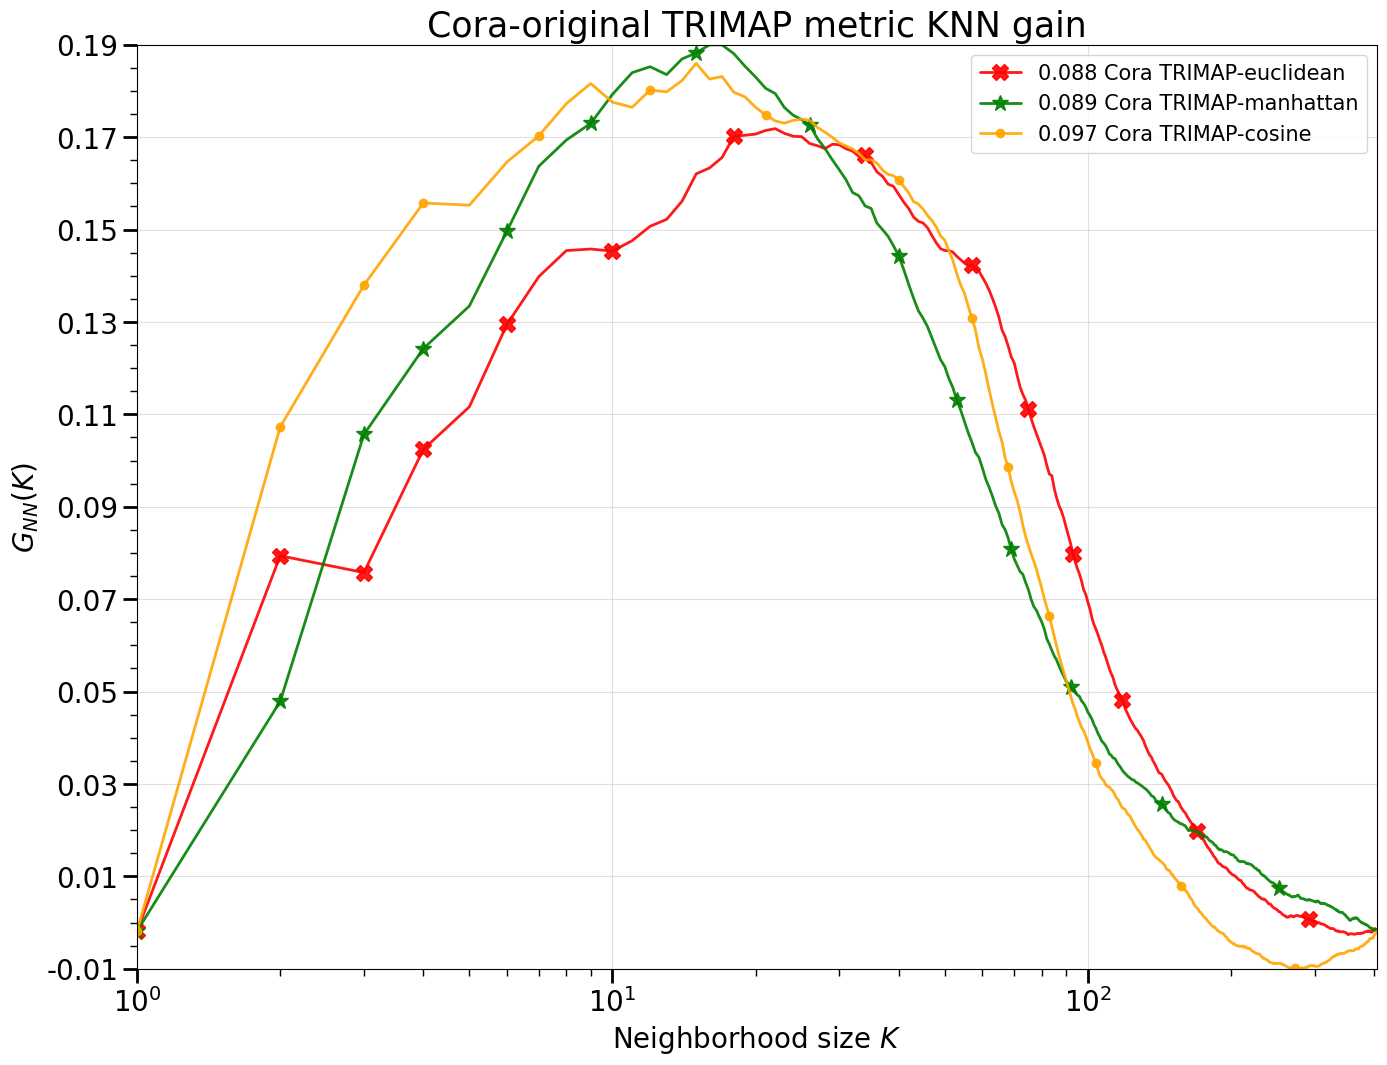

In [3]:
local_metrics = LocalMetric()

for metric in ['euclidean', 'manhattan', 'cosine']:
    umap_post = TRIMAP(n_dims=2, distance=metric)
    umap_results = umap_post.fit_transform(X)

    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=umap_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format(f"{dataset_name}", f"{algorithm_name}-{metric}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} {algorithm_name} metric")

Calculating d_hd
Cora TRIMAP-6
Calculating d_hd
Cora TRIMAP-12
Calculating d_hd
Cora TRIMAP-16
Calculating d_hd
Cora TRIMAP-30
Finished.


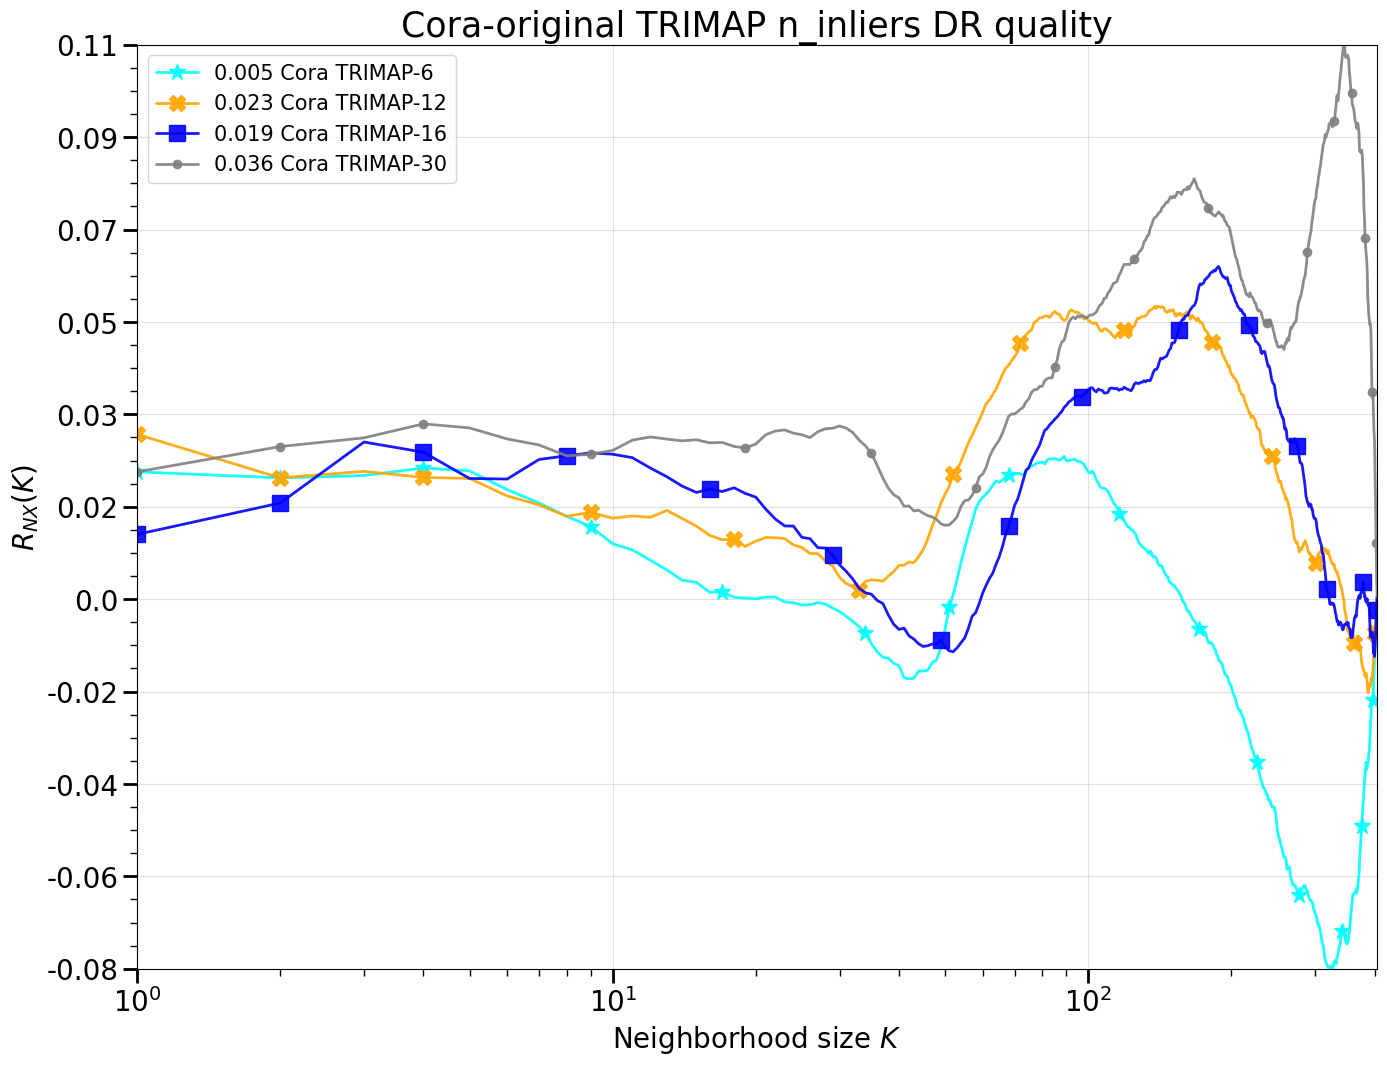

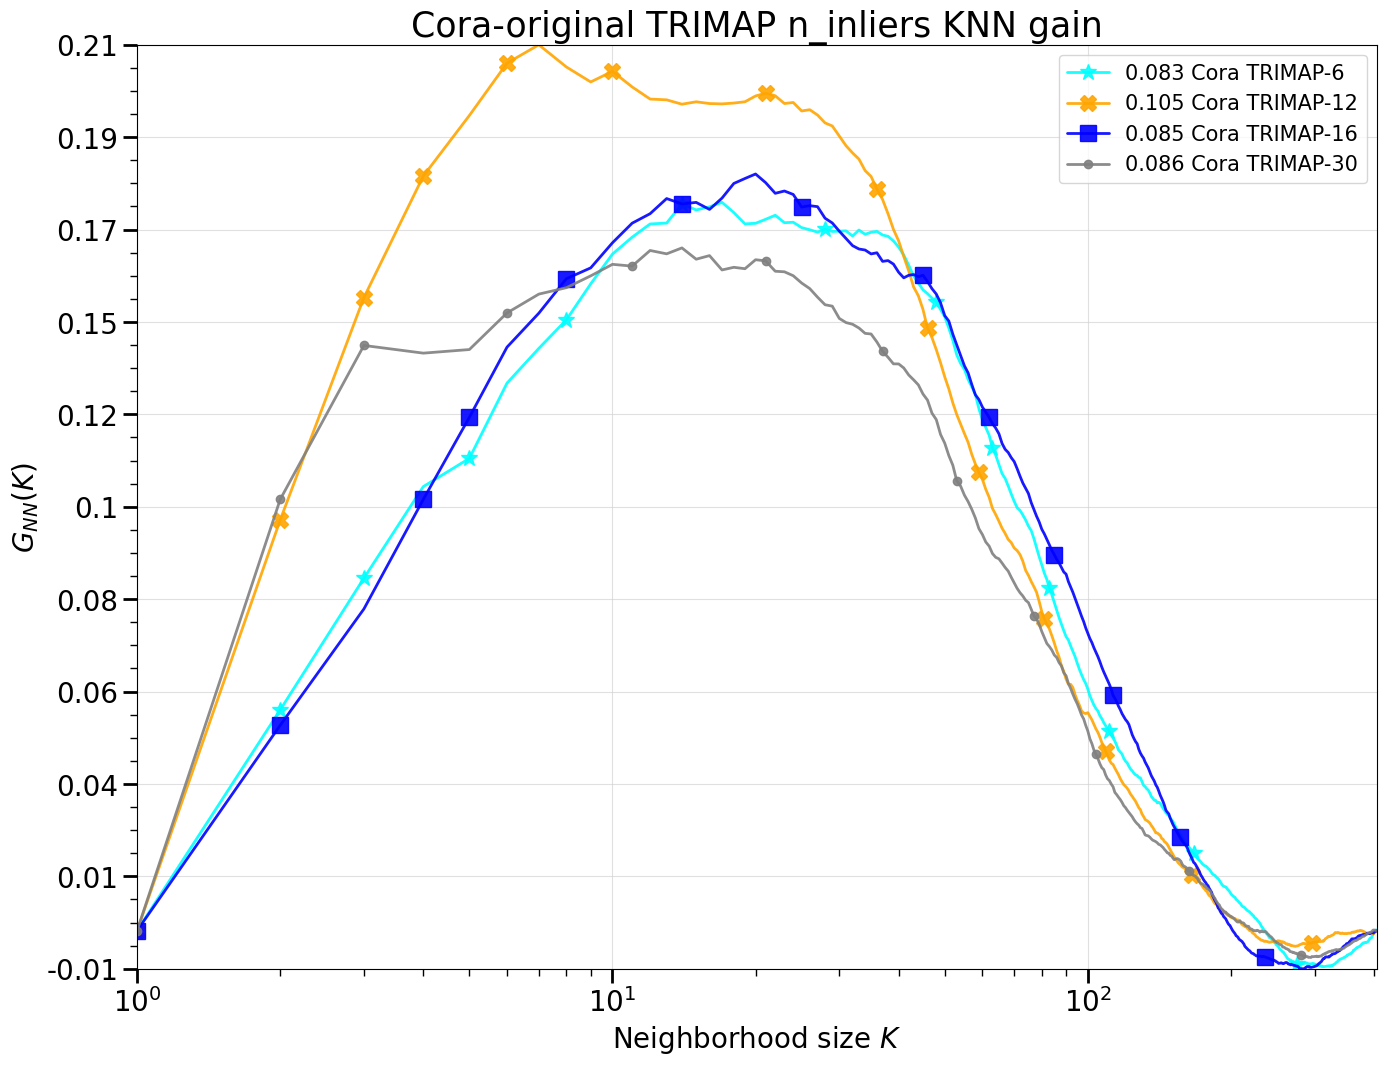

In [4]:
local_metrics = LocalMetric()

for n_inliers in  [6, 12, 16, 30]:
    
    umap_post = TRIMAP(n_dims=2, n_inliers=n_inliers)
    umap_results = umap_post.fit_transform(X)

    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=umap_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{n_inliers}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} {algorithm_name} n_inliers")

Calculating d_hd
Cora TRIMAP-2
Calculating d_hd
Cora TRIMAP-4
Calculating d_hd
Cora TRIMAP-8
Calculating d_hd
Cora TRIMAP-12
Finished.


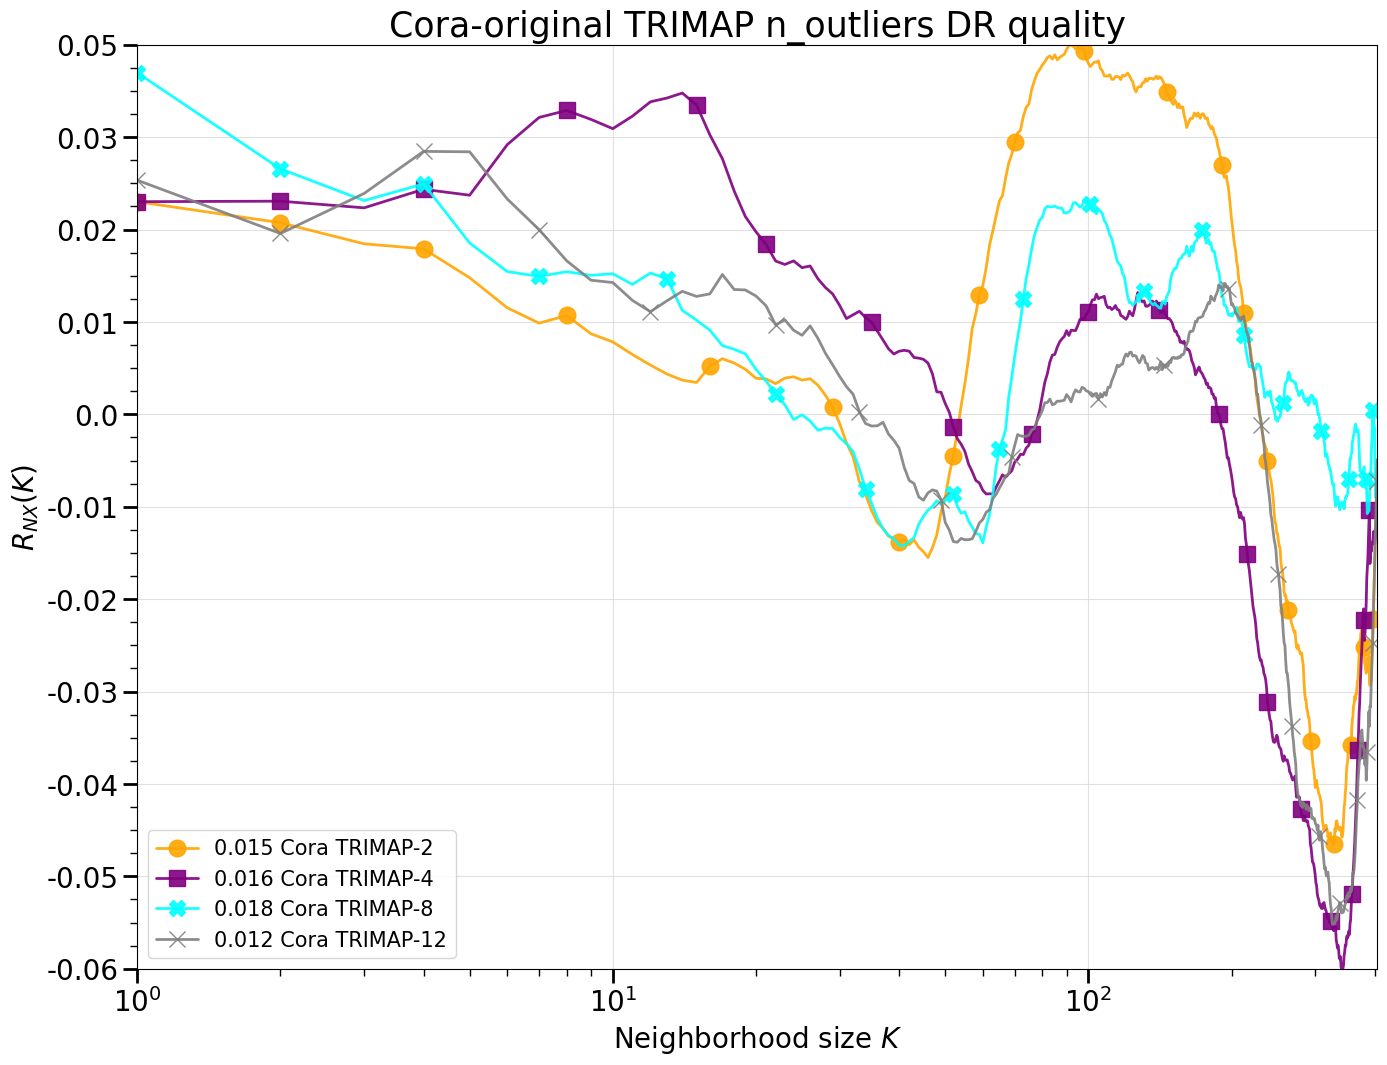

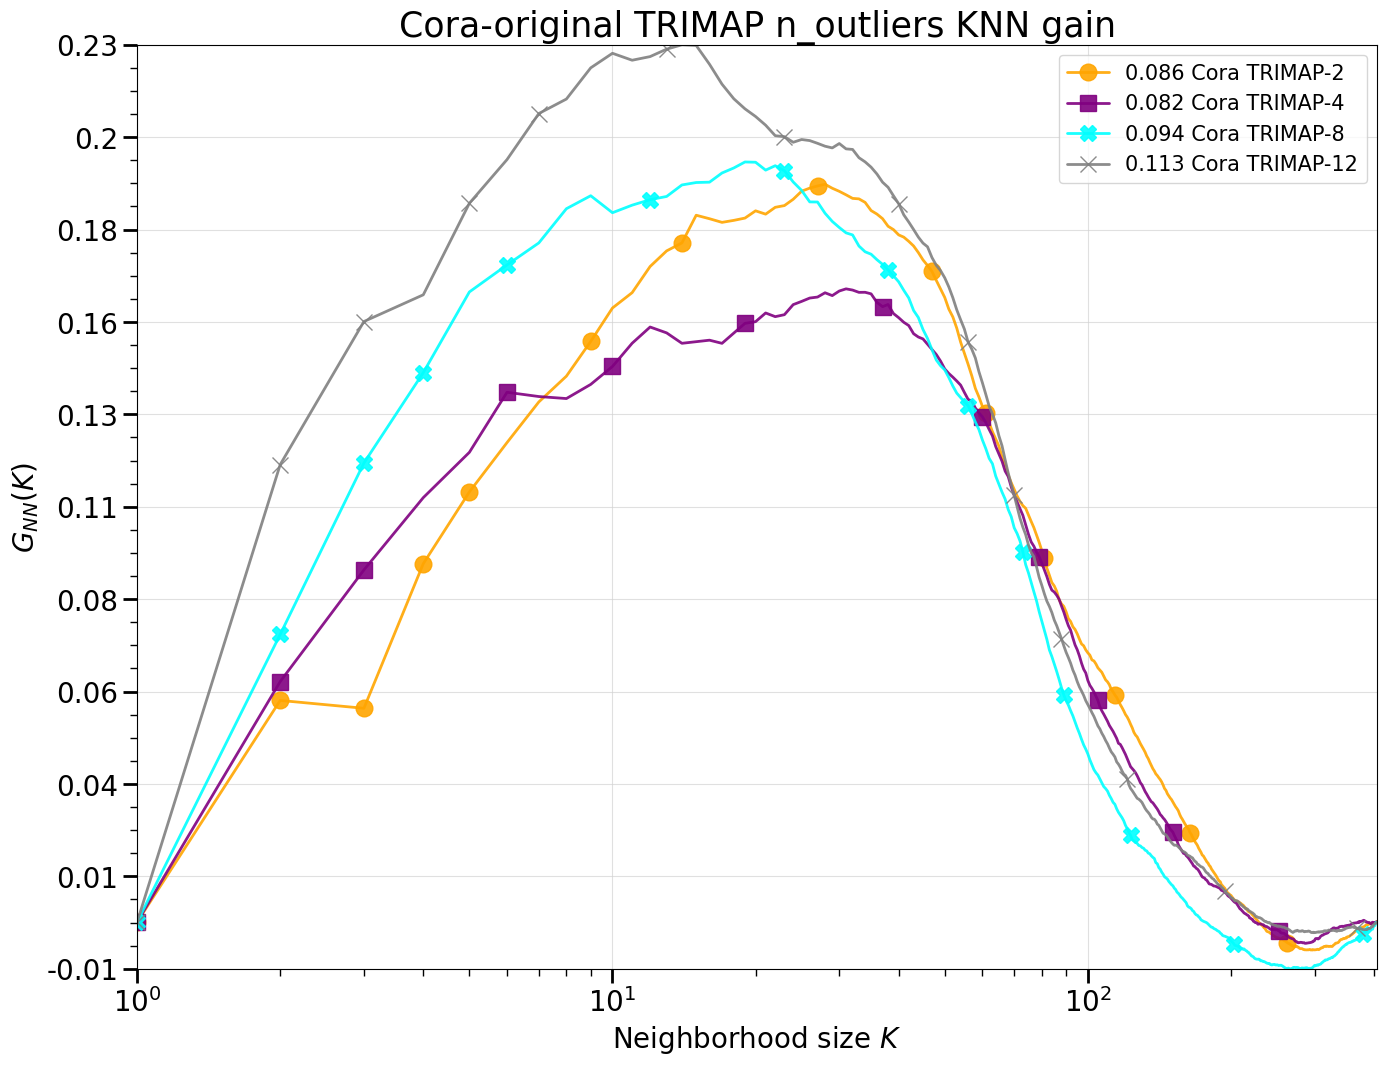

In [5]:
local_metrics = LocalMetric()

for n_outliers in [2, 4, 8, 12]:

    umap_post = TRIMAP(n_dims=2, n_outliers=n_outliers)
    umap_results = umap_post.fit_transform(X)


    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=umap_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{n_outliers}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} {algorithm_name} n_outliers")

Calculating d_hd
Cora TRIMAP-400
Calculating d_hd
Cora TRIMAP-1000
Calculating d_hd
Cora TRIMAP-2000
Calculating d_hd
Cora TRIMAP-5000
Finished.


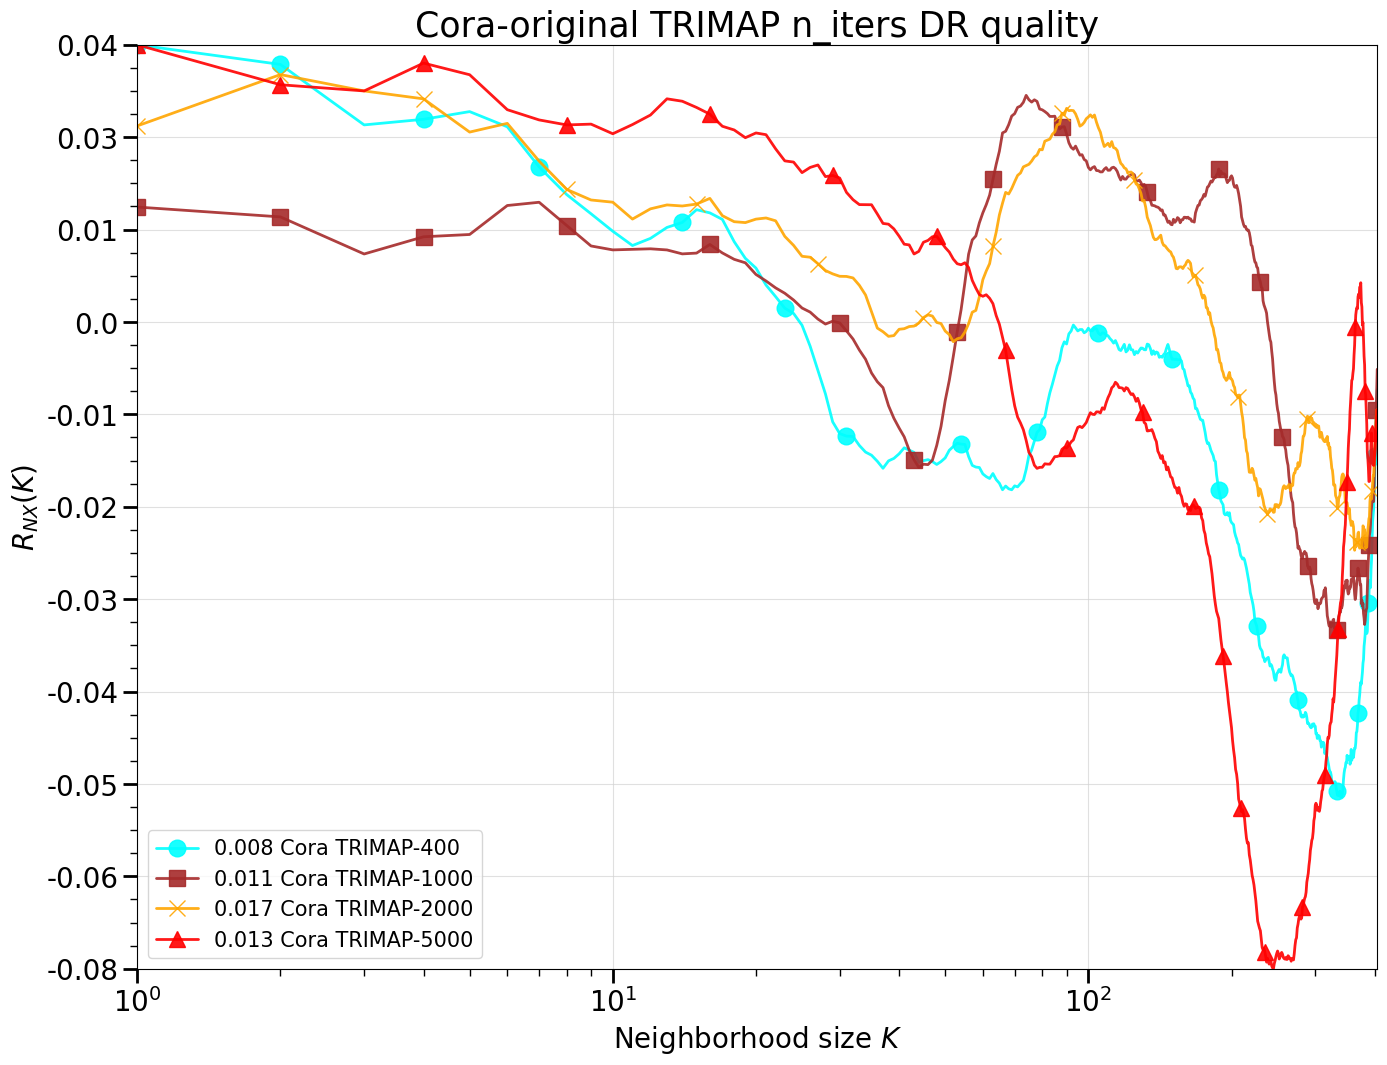

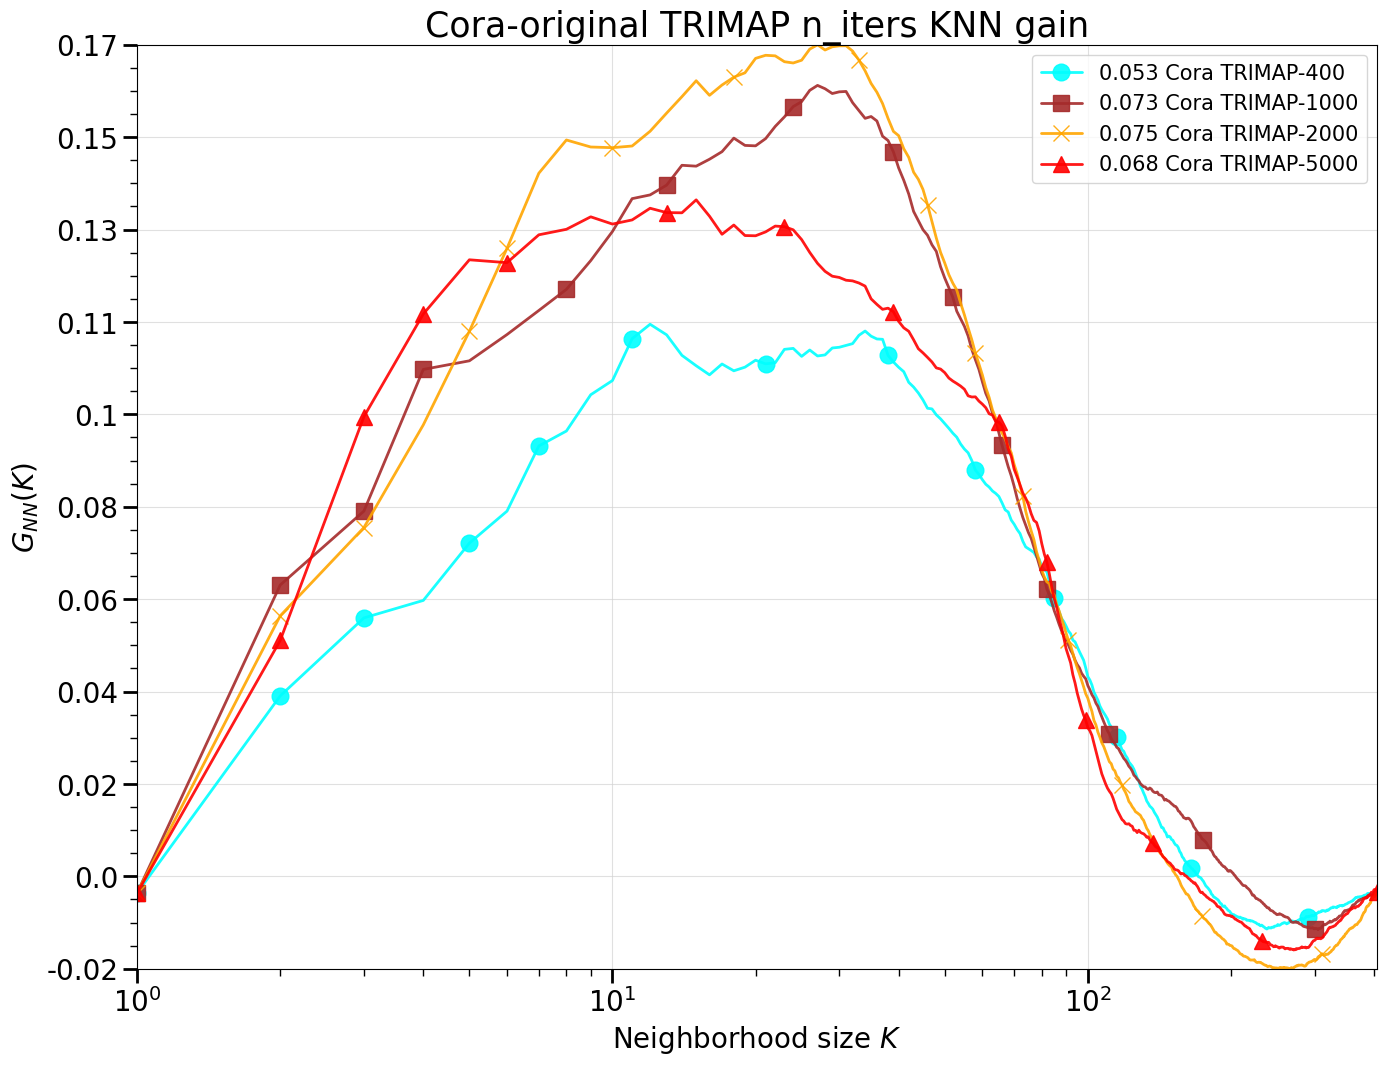

In [6]:
local_metrics = LocalMetric()

for n_iters in [400, 1000, 2000, 5000]:
    umap_post = TRIMAP(n_dims=2, n_iters=n_iters)
    umap_results = umap_post.fit_transform(X)


    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=umap_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{n_iters}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} {algorithm_name} n_iters")

Calculating d_hd
Cora TRIMAP-1
Calculating d_hd
Cora TRIMAP-3
Calculating d_hd
Cora TRIMAP-6
Calculating d_hd
Cora TRIMAP-10
Finished.


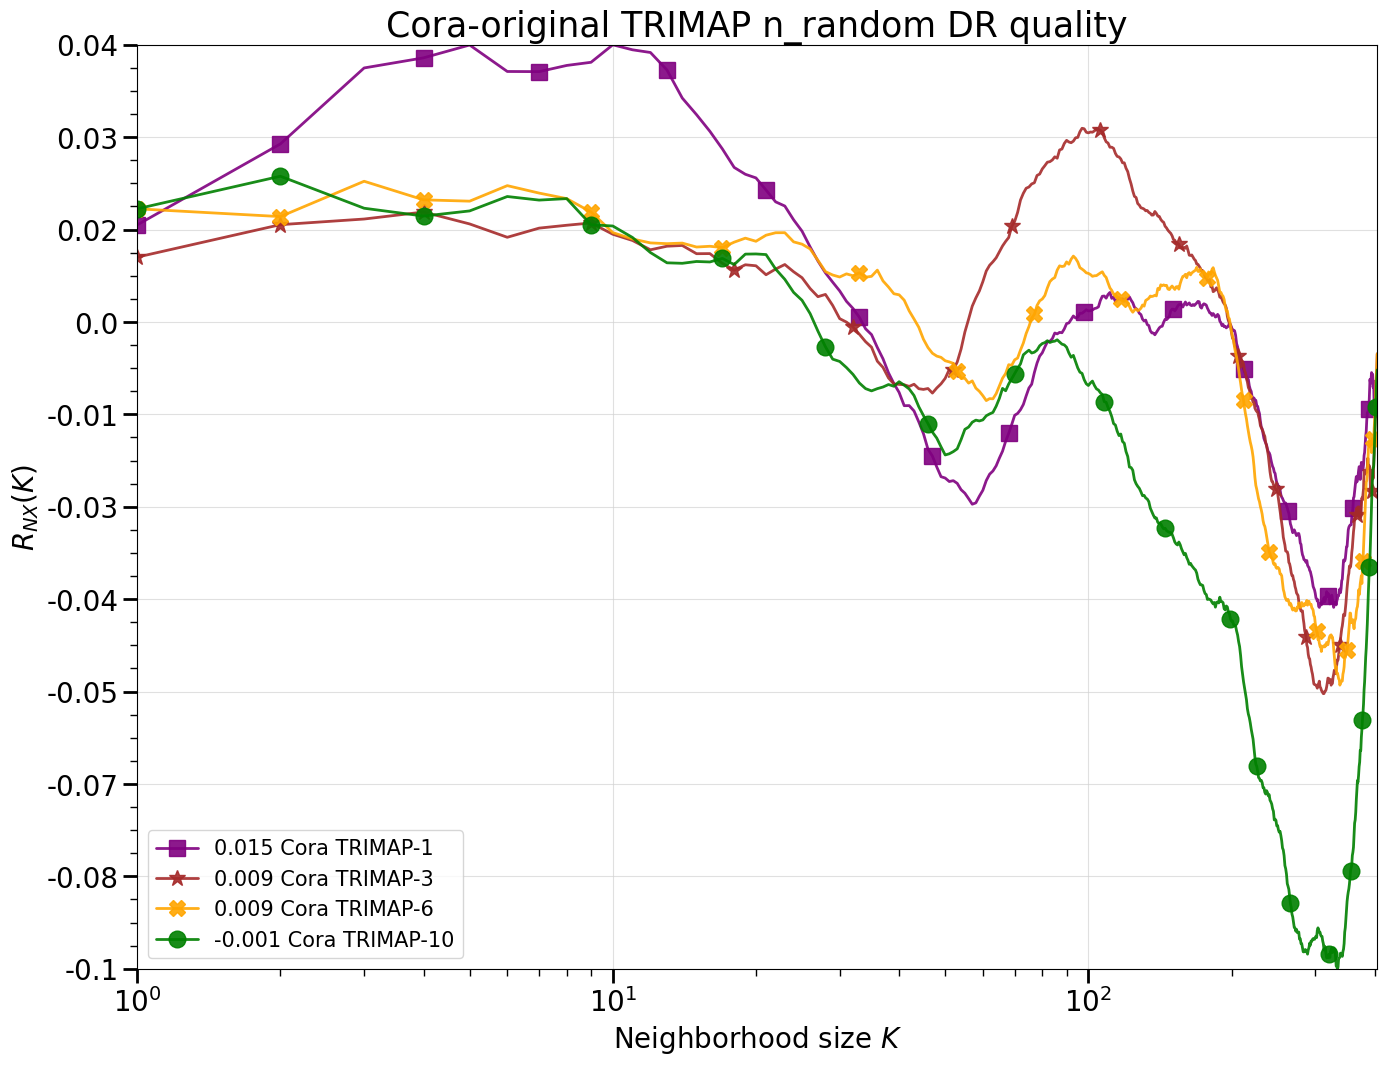

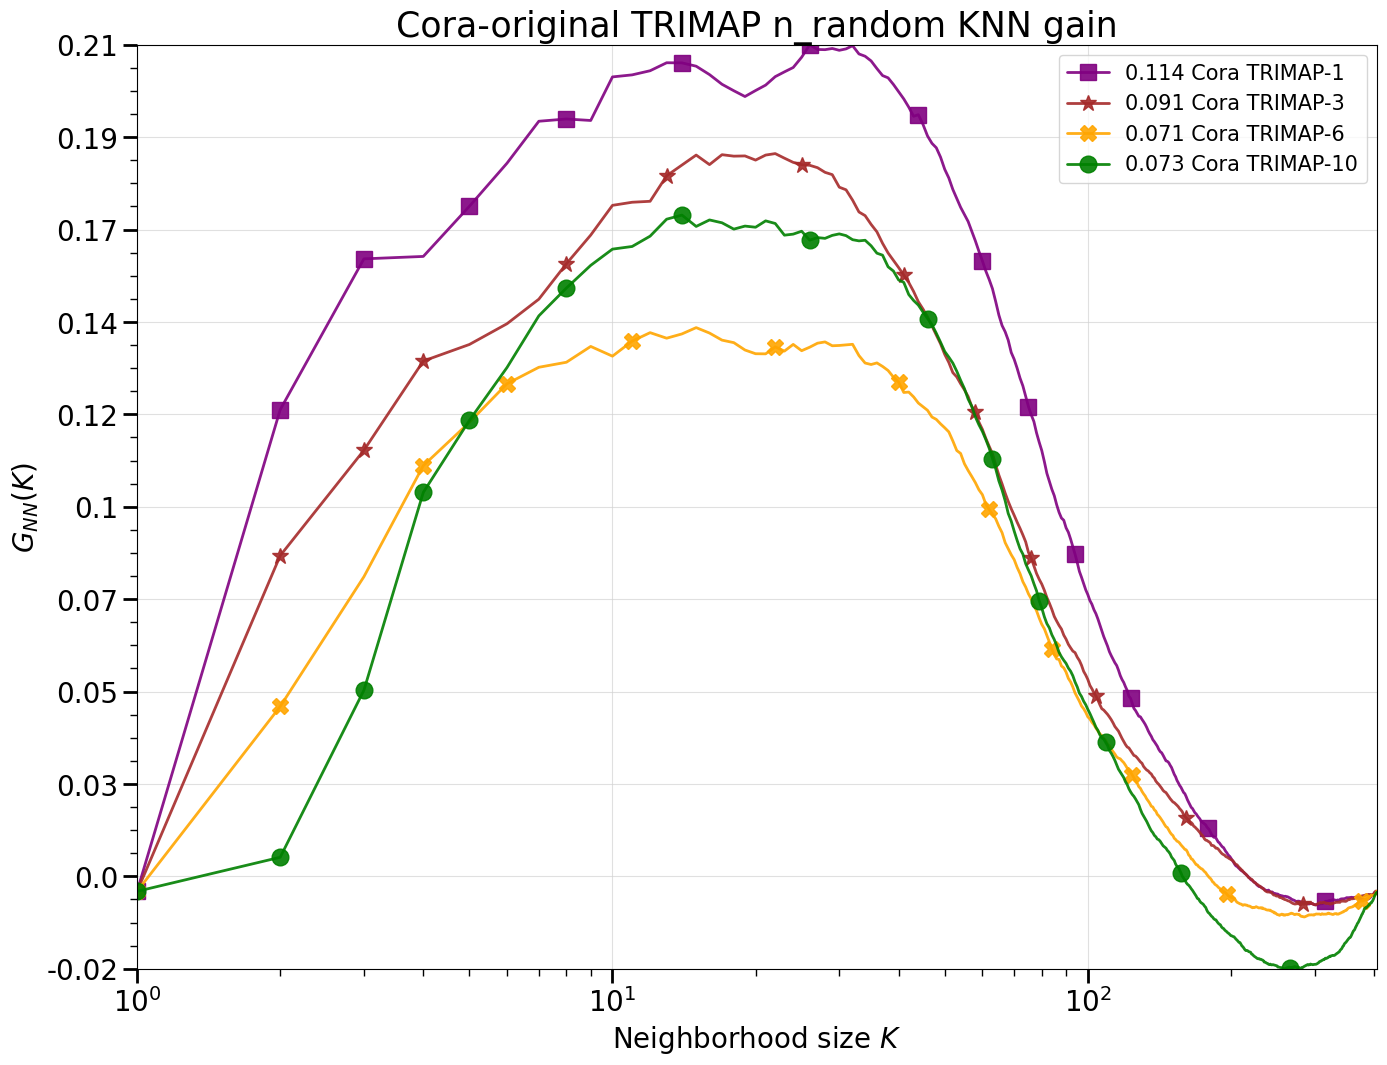

In [7]:
local_metrics = LocalMetric()

for n_random in [1, 3, 6, 10]:
    umap_post = TRIMAP(n_dims=2, n_random=n_random)
    umap_results = umap_post.fit_transform(X)


    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=umap_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{n_random}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} {algorithm_name} n_random")